In [29]:
# !pip install tensorflow keras split-folders opencv-python matplotlib scipy
# !sudo apt-get update
# !sudo apt-get install libgl1-mesa-glx


Defaulting to user installation because normal site-packages is not writeable
Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease                         
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease                 
Hit:5 https://download.docker.com/linux/ubuntu jammy InRelease                 
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease               
Hit:7 https://ppa.launchpadcontent.net/git-core/ppa/ubuntu jammy InRelease     
Hit:4 https://apt.llvm.org/jammy llvm-toolchain-jammy-19 InRelease             
Hit:8 https://ppa.launchpadcontent.net/ondrej/apache2/ubuntu jammy InRelease   
Hit:9 https://ppa.launchpadcontent.net/ondrej/nginx-mainline/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ondrej/php/ubuntu jammy InRelease
Hit:11 https://packagecloud.io/github/git-lfs/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building d

In [30]:
import matplotlib.pyplot as plt 
import numpy as np
import splitfolders
import cv2
import zipfile
import os
import random  # Import the random module
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras import layers, models


In [31]:

# Specify the path to your zip file
zip_file_path = 'Agricultural-crops.zip'  # Replace with your zip file path
extract_to = './'  # Folder where you want to extract the contents

# Open the zip file and extract all contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction completed!")


Extraction completed!


In [32]:
#Splitting Input Data into 3 parts that are training,validation,testing
input_folder='Agricultural-crops'
output_folder='working/Dataset'

split_ratio = (0.8, 0.1, 0.1)
splitfolders.ratio(
    input_folder,
    output=output_folder,
    seed=500,
    ratio=split_ratio,
    group_prefix=None,
)

In [33]:
# Define the parameters
img_size = (224, 224)
batch_size = 32

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Data augmentation for test data (only rescaling)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# Data augmentation for validation data (only rescaling)
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [34]:
# Define the directories for train, test, and validation
train_dir = os.path.join(output_folder, 'train')
test_dir = os.path.join(output_folder, 'test')
valid_dir = os.path.join(output_folder, 'val')

# Create data generators
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 652 images belonging to 30 classes.
Found 105 images belonging to 30 classes.
Found 72 images belonging to 30 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].


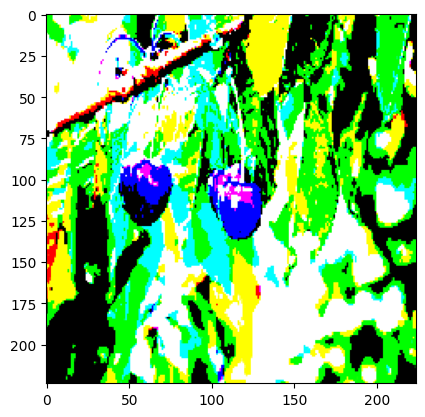

In [35]:
images, label = next(valid_data)
# select a randm image frmo batch_size
idx = random.randint(0, images.shape[0]-1)

# display the image
plt.imshow(images[idx])
plt.show()

In [36]:
#Model Loading

# Load the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))


# Print the model summary to see all the layers
# base_model.summary()

# Freeze the convolutional base
base_model.trainable = False

In [37]:
# Model Building
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(30, activation='softmax')
])

In [38]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
# Train the model
EPOCHS = 25 # 100
model.fit(train_data, epochs=EPOCHS, validation_data=valid_data)

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.0713 - loss: 3.7668 - val_accuracy: 0.2500 - val_loss: 2.8475
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.2316 - loss: 2.9077 - val_accuracy: 0.4306 - val_loss: 2.2525
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.3076 - loss: 2.4780 - val_accuracy: 0.5833 - val_loss: 1.7815
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.3815 - loss: 2.1008 - val_accuracy: 0.5694 - val_loss: 1.5729
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.4874 - loss: 1.8403 - val_accuracy: 0.6806 - val_loss: 1.3284
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.5687 - loss: 1.5816 - val_accuracy: 0.6667 - val_loss: 1.2479
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.5800 - loss: 1.4174 - val_accuracy: 0.7500 - val_loss: 1.0768
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.5833 - loss: 1.3658 - val_accuracy: 0.7639 - val_loss:

In [40]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.8446 - loss: 0.5827
Test Accuracy: 83.81%


In [41]:
class_names = {0: 'Cherry', 1: 'Coffee-plant', 2: 'Cucumber', 3: 'Fox_nut(Makhana)', 4: 'Lemon', 5: 'Olive-tree',
               6: 'Pearl_millet(bajra)', 7: 'Tobacco-plant', 8: 'almond', 9: 'banana', 10: 'cardamom', 11: 'chilli',
               12: 'clove', 13: 'coconut', 14: 'cotton', 15: 'gram', 16: 'jowar', 17: 'jute', 18: 'maize',
               19: 'mustard-oil', 20: 'papaya', 21: 'pineapple', 22: 'rice', 23: 'soyabean', 24: 'sugarcane',
               25: 'sunflower', 26: 'tea', 27: 'tomato', 28: 'vigna-radiati(Mung)', 29: 'wheat'}

In [42]:
#Model Prediction

def predict_img(image,model):
    test_img=cv2.imread(image)
    test_img=cv2.resize(test_img,(224,224))
    test_img=np.expand_dims(test_img, axis=0)
    result=model.predict(test_img)
    r=np.argmax(result)
    print(class_names[r])

In [43]:
#Saving Model
model.save('Crop_CLF_V1.keras')

In [44]:
print(tf.__version__)

2.18.0


In [1]:
predict_img('working/Dataset/test/banana/image (24).jpg',model)

NameError: name 'predict_img' is not defined